In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Preprocessing

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(inplace=True, axis=0)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
# Dropping irrelevant columns
df = df.drop(['Unnamed: 0','key'],axis = 1)

In [10]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [12]:
# pickup_datetime is not in the appropriate format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


## Identifying and Handling Outliers

<Axes: xlabel='fare_amount'>

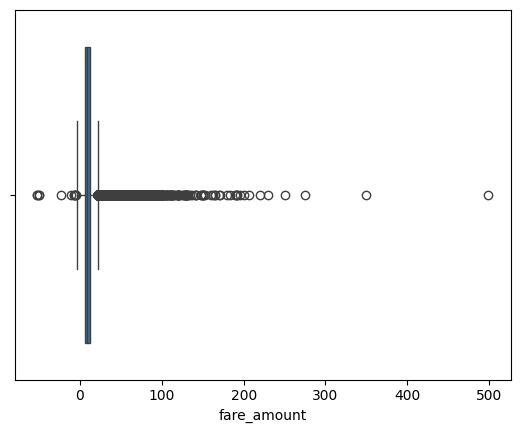

In [15]:
sns.boxplot(x = df['fare_amount'])
# plt.boxplot(x = df['fare_amount'])

<Axes: xlabel='fare_amount', ylabel='Density'>

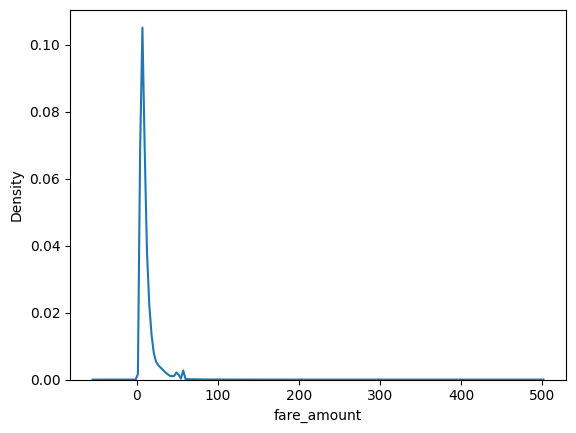

In [16]:
sns.kdeplot(df['fare_amount'])

<Axes: xlabel='fare_amount'>

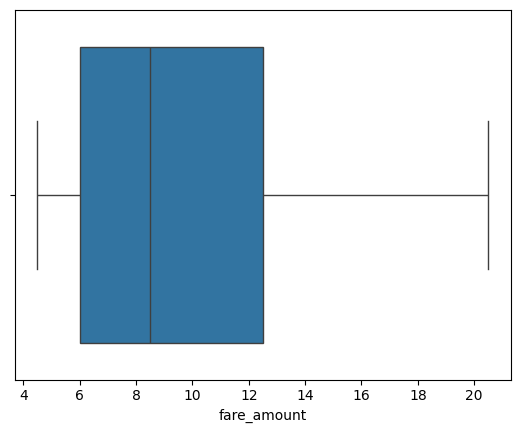

In [17]:
# Quantile based flooring and capping
# Values above 90 precentile are floored to 90 percentile and values below 10 percentile are capped to 10 percentile

ninety = np.percentile(df['fare_amount'],90)
ten = np.percentile(df['fare_amount'],10)

df['fare_amount'] = np.where(df['fare_amount'] > ninety,ninety,df['fare_amount'])
df['fare_amount'] = np.where(df['fare_amount'] < ten,ten,df['fare_amount'])

sns.boxplot(x = df['fare_amount'])

## Checking the correlation

In [18]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.148733,0.004352,-0.002321,0.002407,-0.004505,0.013400
pickup_datetime,0.148733,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398
pickup_longitude,0.004352,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.002321,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.002407,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.004505,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.013400,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<Axes: >

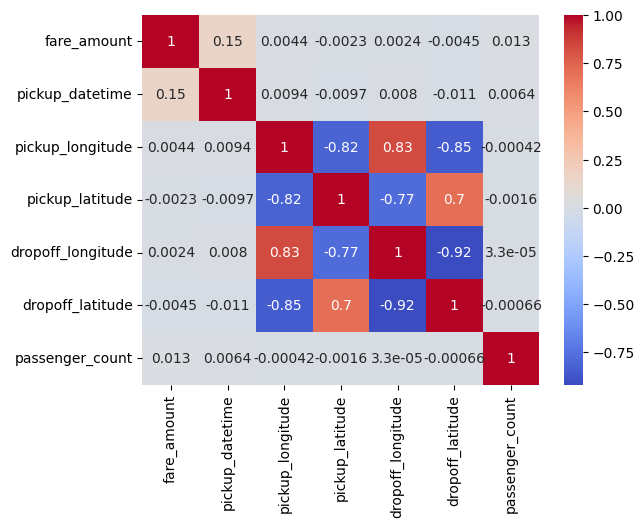

In [19]:
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True)

In [20]:
# Defining a distance measure for Linear Regression



In [21]:
# Defining a independent parameter

def calc_dist(lat_1,lat_2,lon_1,lon_2):
    lat_1,lat_2,lon_1,lon_2 = map(np.radians, [lat_1,lat_2,lon_1,lon_2])
    diff_lat = lat_2 - lat_1
    diff_lon = lon_2 - lon_1
    
    dist = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2)**2 + np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2)**2))

    return dist


In [22]:
df = df[(df.pickup_latitude < 90) & (df.dropoff_latitude < 90) &
        (df.pickup_latitude > -90) & (df.dropoff_latitude > -90) &
        (df.pickup_longitude < 180) & (df.dropoff_longitude < 180) &
        (df.pickup_longitude > -180) & (df.dropoff_longitude > -180)]

df['Distance'] = [calc_dist(df['dropoff_latitude'][i], df['pickup_latitude'][i], df['dropoff_longitude'][i], df['pickup_longitude'][i])
                  for i in df.index]

In [23]:
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
6,20.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,11.731015
7,4.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.000000
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.332711
9,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.889417


In [24]:
df['Distance'] = df['Distance'].astype(float).round(2)

In [25]:
X = df['Distance'].values.reshape(-1,1)
y = df['fare_amount'].values.reshape(-1,1)

In [26]:
X

array([[ 1.68],
       [ 2.46],
       [ 5.04],
       ...,
       [12.85],
       [ 3.54],
       [ 5.42]])

In [27]:
y

array([[ 7.5],
       [ 7.7],
       [12.9],
       ...,
       [20.5],
       [14.5],
       [14.1]])

In [28]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = std.fit_transform(X)
print("X_std :- ", X_std)

y_std = std.fit_transform(y)
print("y_std :- ", y_std)

X_std :-  [[-0.04973484]
 [-0.04768015]
 [-0.04088388]
 ...
 [-0.02031066]
 [-0.0448352 ]
 [-0.03988288]]
y_std :-  [[-0.49221434]
 [-0.45244004]
 [ 0.58169179]
 ...
 [ 2.09311524]
 [ 0.8998862 ]
 [ 0.8203376 ]]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3, random_state=2)

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
lr.predict(X_test)

array([[0.00037078],
       [0.0004534 ],
       [0.00039963],
       ...,
       [0.00056192],
       [0.00041918],
       [0.00035856]])

In [33]:
y_test

array([[-0.7905216 ],
       [-0.19390708],
       [-1.00928026],
       ...,
       [ 0.42259459],
       [-0.59165009],
       [-1.08882886]])

In [34]:
print("Slope: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Slope:  [[0.01855737]]
Intercept:  [0.00132893]


In [35]:
y_pred = lr.predict(X_test)

Text(0, 0.5, 'Fare Amount')

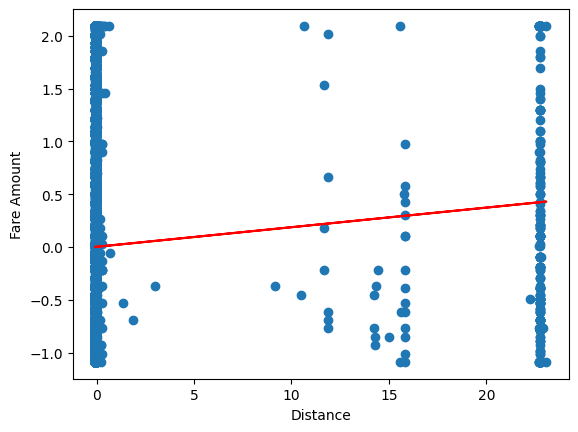

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train), color='red')
plt.xlabel('Distance')  # Independent variable
plt.ylabel('Fare Amount') # Dependent variable

In [37]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error:  0.8148032727856294
Mean Squared Error:  0.9937633944940871
RMSE:  0.9968768201207645
R2 Score:  0.02026797158863891


In [38]:

metrics._scorer(y_test, y_pred)

TypeError: 'module' object is not callable

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=12, random_state=2)


In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred)*100)

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.xlabel('Distance')  # Independent variable
plt.ylabel('Fare Amount') # Dependent variable